<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

### Load Data From CSV File


In [3]:
# df = pd.read_csv('loan_train.csv')
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



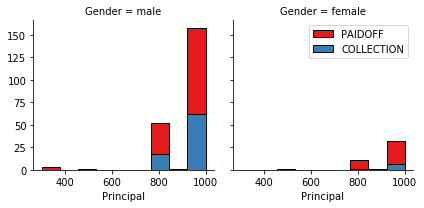

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

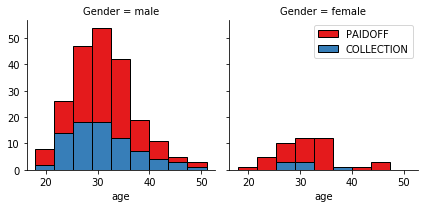

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


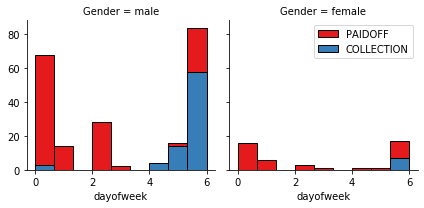

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
# set both'Bechalor' and 'Master or Above' to 'Bechalor or Above'
df['education'].replace(to_replace=['Bechalor','Master or Above'], value=['Bechalor or Above','Bechalor or Above'],inplace=True)
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor or Above     PAIDOFF        0.739130
                      COLLECTION     0.260870
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor or Above
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor or Above,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor or Above,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
# set prediction label to binary for the model
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y = df['loan_status'].values

df['loan_status'].value_counts()

1    260
0     86
Name: loan_status, dtype: int64

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.391578  ,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.55376959, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.391578  , -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.391578  , -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.391578  , -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
# create train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


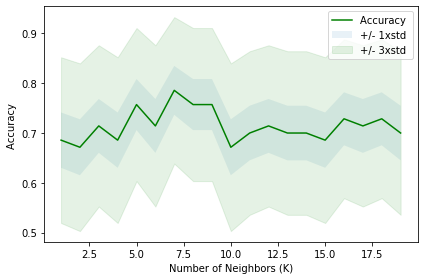

The best k for this dataset is:  7


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 20 # set max number of k neighbors
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# find the k gives the best accuracy
best_k = mean_acc.argmax()+1
print('The best k for this dataset is: ',best_k)

In [22]:
k = best_k
#Train Model and Predict  
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred_knn = neigh.predict(X_test)

LABLES = ["COLLECTION","PAIDOFF"]
# print(yhat.tolist().count('PAIDOFF'))
# print(y_test.tolist().count('PAIDOFF'))
# print(yhat.tolist().count('COLLECTION'))
# print(y_test.tolist().count('COLLECTION'))

model = model_knn
y_pred = y_pred_knn

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred),'\n\n')

# set dataframe index 
index_name = ['TrainSet','TestSet']
metrics_types=['Jaccard_score','F1_score']
# Get Scores
Scores = pd.DataFrame(columns=metrics_types,index=index_name)
Scores.index.name='Datasets'
for n in index_name:
    if n == index_name[0]:
        X_temp = X_train
        y_temp = y_train
    else:
        X_temp = X_test
        y_temp = y_test
    Scores.loc[n,metrics_types[0]] = metrics.jaccard_score(y_temp, model.predict(X_temp))
    Scores.loc[n,metrics_types[1]] = metrics.f1_score(y_temp, model.predict(X_temp))

print('Evaluation Scores :')
display(Scores)

Train set Accuracy:  0.8043478260869565
Test set Accuracy:  0.7 


Evaluation Scores :


,Jaccard_score,F1_score
Datasets,,
TrainSet,0.774059,0.872642
TestSet,0.765625,0.867257


# Decision Tree


In [23]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Hyper parameters range intialization for tuning 
parameters={"criterion":["gini", "entropy"],
            "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30] }

# Initialise tree model
model_tree = DecisionTreeClassifier()

# Grid search for best parameters
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model_tree,param_grid=parameters,scoring='f1_weighted',cv=3)
tuning_model.fit(X_train,y_train)
tuning_model.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'splitter': 'random'}

In [24]:
# Create tree model with the best paarameters from grid search
model_tree = DecisionTreeClassifier(**tuning_model.best_params_)
print(model_tree) # it shows the default parameters
# Train the tree model on training set
model_tree.fit(X_train,y_train)
# Predict on testset
y_pred_tree = model_tree.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='log2', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


In [25]:
# Evaluate the model
model = model_tree
y_pred = y_pred_tree

from sklearn import metrics
print("\n\nTrain set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred),'\n')

# Display feature importance
print('\n\nFeature importance: ')
featuersImportance = pd.DataFrame(columns=Feature.columns,index=['Feature importance'])
featuersImportance.loc['Feature importance']=model.feature_importances_
display(featuersImportance.sort_values(by='Feature importance', axis = 1, ascending = False))


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# set dataframe index 
index_name = ['TrainSet','TestSet']
metrics_types=['Jaccard_score','F1_score']

# Get Scores
Scores = pd.DataFrame(columns=metrics_types,index=index_name)
Scores.index.name='Datasets'
for n in index_name:
    if n == index_name[0]:
        X_temp = X_train
        y_temp = y_train
    else:
        X_temp = X_test
        y_temp = y_test
    Scores.loc[n,metrics_types[0]] = metrics.jaccard_score(y_temp, model.predict(X_temp))
    Scores.loc[n,metrics_types[1]] = metrics.f1_score(y_temp, model.predict(X_temp))

print('\n\nEvaluation Scores :')
display(Scores)



Train set Accuracy:  0.7644927536231884
Test set Accuracy:  0.7571428571428571 



Feature importance: 


,weekend,Principal,college,Gender,High School or Below,age,Bechalor or Above,terms
Feature importance,0.812527,0.0429225,0.0366881,0.0357391,0.0293091,0.0254271,0.0173875,0




Evaluation Scores :


,Jaccard_score,F1_score
Datasets,,
TrainSet,0.749035,0.856512
TestSet,0.75,0.857143


# Support Vector Machine


In [26]:
from sklearn import svm

# Hyper parameters range intialization for tuning 
from sklearn.utils.fixes import loguniform
parameters={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

# Initialise tree model
model_svm = svm.SVC()

# Grid search for best parameters
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model_svm,param_grid=parameters,scoring='f1_weighted',cv=3)
tuning_model.fit(X_train,y_train)
tuning_model.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [27]:
# Create svm model with the best paarameters from grid search
model_svm = svm.SVC(**tuning_model.best_params_)
print(model_svm) # it shows the default parameters
# Train the svm model on training set
model_svm.fit(X_train,y_train)
# Predict on testset
y_pred_svm = model_svm.predict(X_test)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [28]:
# Evaluate model
model = model_svm
y_pred = y_pred_svm

from sklearn import metrics
print("\n\nTrain set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred),'\n')


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# set dataframe index 
index_name = ['TrainSet','TestSet']
metrics_types=['Jaccard_score','F1_score']

# Get Scores
Scores = pd.DataFrame(columns=metrics_types,index=index_name)
Scores.index.name='Datasets'
for n in index_name:
    if n == index_name[0]:
        X_temp = X_train
        y_temp = y_train
    else:
        X_temp = X_test
        y_temp = y_test
    Scores.loc[n,metrics_types[0]] = metrics.jaccard_score(y_temp, model.predict(X_temp))
    Scores.loc[n,metrics_types[1]] = metrics.f1_score(y_temp, model.predict(X_temp))

print('Evaluation Scores :')
display(Scores)



Train set Accuracy:  0.8478260869565217
Test set Accuracy:  0.7428571428571429 

Evaluation Scores :


,Jaccard_score,F1_score
Datasets,,
TrainSet,0.819742,0.900943
TestSet,0.714286,0.833333


# Logistic Regression


In [29]:
from sklearn.linear_model import LogisticRegression

# Hyper parameters range intialization for tuning 
from sklearn.utils.fixes import loguniform
parameters={'penalty': ['l1','l2'], 
            'C': np.logspace(-4, 4, 50),
            'solver': ['newton-cg','lbfgs', 'liblinear']}

# Initialise tree model
model_LR = LogisticRegression()

# Grid search for best parameters
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model_LR,param_grid=parameters,scoring='f1_weighted',cv=3)
tuning_model.fit(X_train,y_train)
tuning_model.best_params_

/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/xiaoliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWa

{'C': 0.0013894954943731374, 'penalty': 'l2', 'solver': 'liblinear'}

In [30]:
# Create tree model with the best paarameters from grid search
model_LR = LogisticRegression(**tuning_model.best_params_)
print(model_LR) # it shows the default parameters
# Train the tree model on training set
model_LR.fit(X_train,y_train)
# Predict on testset
y_pred_LR = model_LR.predict(X_test)

LogisticRegression(C=0.0013894954943731374, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [31]:
# Evaluate model
model = model_LR
y_pred = y_pred_LR

from sklearn import metrics
# print("\n\nTrain set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
# print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred),'\n')


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# set dataframe index 
index_name = ['TrainSet','TestSet']
metrics_types=['Jaccard_score','F1_score','Log_loss']

# Get Scores
Scores = pd.DataFrame(columns=metrics_types,index=index_name)
Scores.index.name='Datasets'
for n in index_name:
    if n == index_name[0]:
        X_temp = X_train
        y_temp = y_train
    else:
        X_temp = X_test
        y_temp = y_test
    Scores.loc[n,metrics_types[0]] = metrics.jaccard_score(y_temp, model.predict(X_temp))
    Scores.loc[n,metrics_types[1]] = metrics.f1_score(y_temp, model.predict(X_temp))
    Scores.loc[n,metrics_types[2]] = metrics.log_loss(y_temp, model.predict_proba(X_temp))

print('Evaluation Scores :')
display(Scores)

Evaluation Scores :


,Jaccard_score,F1_score,Log_loss
Datasets,,,
TrainSet,0.725806,0.841121,0.656341
TestSet,0.651515,0.788991,0.663473


# Model Evaluation using Test set


In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [33]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

### Load Test set for evaluation


In [34]:
## load data and prepare the data
# test_df = pd.read_csv('loan_test.csv')
test_df = pd.read_csv(path)
display(test_df.head())

# prepare the dataset 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['education'].replace(to_replace=['Bechalor','Master or Above'], value=['Bechalor or Above','Bechalor or Above'],inplace=True)
# set prediction label to binary for the model
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

display(test_df.head())

# display(df.groupby(['education'])['loan_status'].value_counts(normalize=True))

test_df[['Principal','terms','age','Gender','education']].head()
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)

Feature_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor or Above,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Bechalor or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor or Above,0,6,1


,Principal,terms,age,Gender,weekend,Bechalor or Above,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,1,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [35]:
# setup the dataset for model evaluation 
X_testData = Feature_test
X_testData= preprocessing.StandardScaler().fit(X_testData).transform(X_testData)
y_testData = test_df['loan_status'].values

In [36]:
# Here is list of models trained from the train dataset
trainedModels = [model_knn, model_tree, model_svm, model_LR]

# evaluate the prediction outcomes
# set dataframe index 
model_types = ['KNN','Decision_tree','SVM','Logistic_regression']
metrics_types=['Jaccard_score','F1_score','Log_loss']

# Get Scores
Scores = pd.DataFrame(columns=metrics_types,index=model_types)
Scores.index.name='Algorithm'
for i,m in enumerate(model_types):
    # get trained model
    model = trainedModels[i]
    # make prediction of the data
    y_pred = trainedModels[i].predict(X_testData)
    Scores.loc[m,metrics_types[0]] = metrics.jaccard_score(y_testData, y_pred)
    Scores.loc[m,metrics_types[1]] = metrics.f1_score(y_testData, y_pred)
    if m == 'Logistic_regression':
        Scores.loc[m,metrics_types[2]] = metrics.log_loss(y_testData, model.predict_proba(X_testData))

print('Evaluation Scores :')
display(Scores)

Evaluation Scores :


,Jaccard_score,F1_score,Log_loss
Algorithm,,,
KNN,0.653846,0.790698,NaN
Decision_tree,0.740741,0.851064,NaN
SVM,0.673469,0.804878,NaN
Logistic_regression,0.72549,0.840909,0.660739


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
